### Naive Bayes

#### Spam email classification
Classify emails into Spam or Non-Spam

In [51]:
# Load libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
data = pd.read_csv("emails.csv")
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Know the shape - rows and columns
data.shape

(5172, 3002)

In [6]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [25]:
spam_count = data[data['Prediction'] == 1].shape[0]
nonspam_count = data[data['Prediction'] == 0].shape[0]
print("\nSpam emails:", spam_count)
print("Non-spam emails:", nonspam_count)


Spam emails: 1500
Non-spam emails: 3672


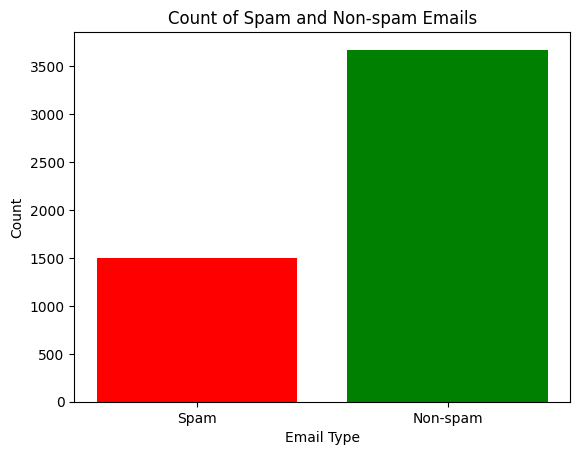

In [27]:
# Simple bar graph
categories = ['Spam', 'Non-spam']
counts = [spam_count, nonspam_count]

plt.bar(categories, counts, color=['red', 'green'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Count of Spam and Non-spam Emails')
plt.show()

#### Checking the distribution using histplot
- iterate over the first 10 columns
- check if the column is numeric
- if yes, use Seaborn’s histplot to plot the distribution of the data along with Kernel Density Estimate (KDE)

Gives an idea of how the values in that column are spread out

Kernel Density Estimate (KDE) is a method to create a smooth curve that shows how your data is distributed. Instead of using bumpy bars like a histogram, KDE "spreads out" each data point into a small, smooth curve (or bump) and then adds all these curves together. This gives you a clear picture of where the data points tend to cluster and where they are more sparse.

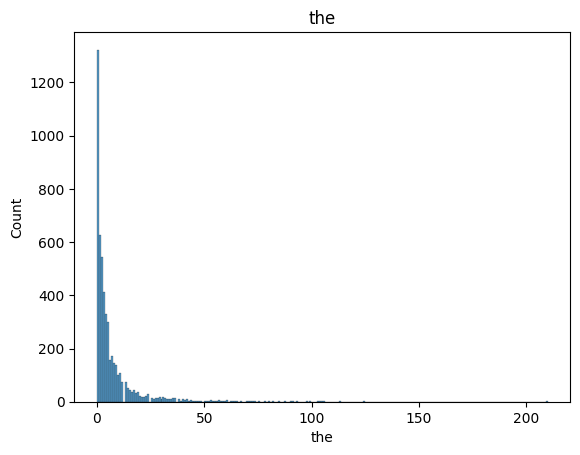

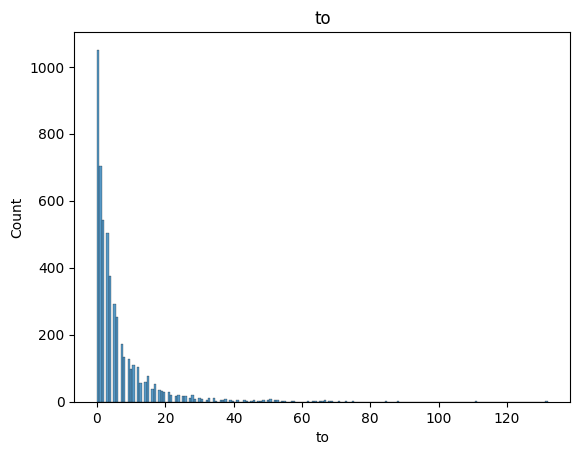

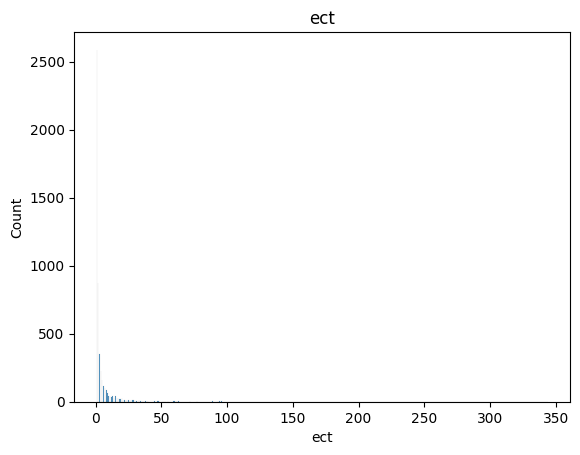

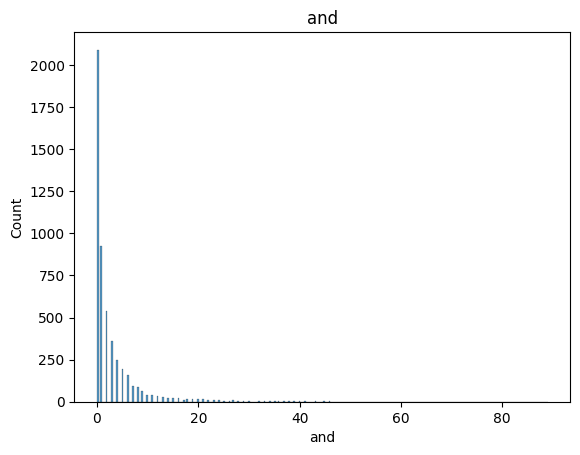

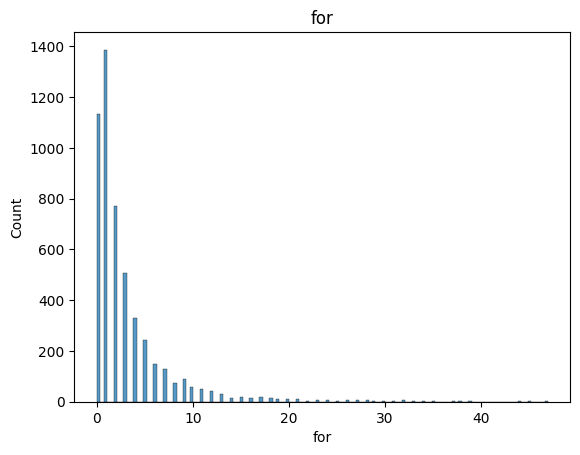

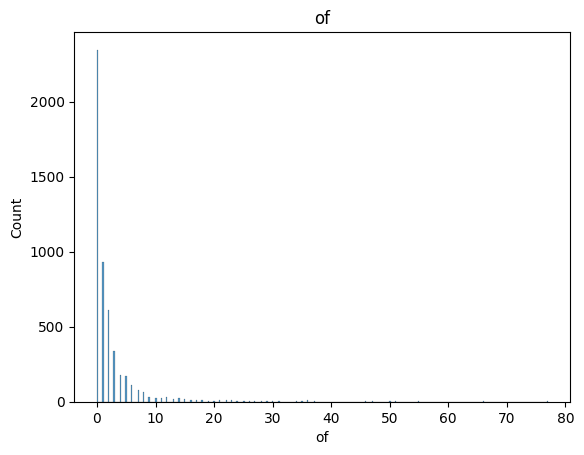

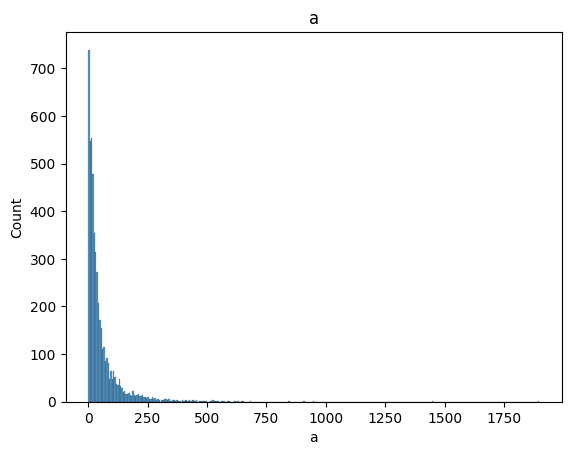

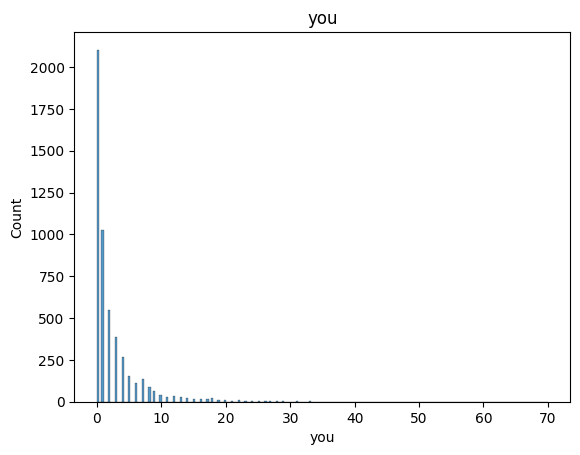

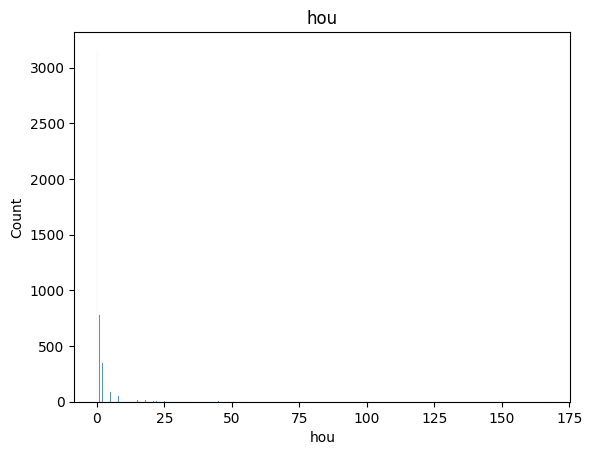

In [29]:
for col in data.columns[:10]:
    if data[col].dtype != 'object':
        sns.histplot(data[col]).set_title(col)
        plt.show()

#### Normalization

- create an instance *scaler* using *MinMaxScaler* 
- apply **fit_transform function**
    Each feature's transformation is computed as:

    *scaled_value = value − min / max − min*

    This ensures that each feature’s values are rescaled to the range [0, 1].

In [13]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop('Email No.', axis = 1))
data_normalized = pd.DataFrame(data_scaled, columns=data.drop('Email No.', axis = 1).columns)
data_normalized.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001054,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.038095,0.098485,0.067055,0.067416,0.127660,0.025974,0.053741,0.014286,0.161677,0.080717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004215,0.000000,0.000000,0.017937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.037879,0.061224,0.000000,0.106383,0.012987,0.026870,0.028571,0.059880,0.004484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.033333,0.045455,0.046647,0.011236,0.106383,0.025974,0.030032,0.000000,0.053892,0.013453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0,0.0


In [14]:
# Divide the dataset for training and testing

X = data_normalized.drop('Prediction', axis = 1)
y = data_normalized['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


#### Gaussian Naive Bayes Classifier

In [16]:
# Model building
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Gaussian NB classifier: {accuracy*100:.2f}%")

Accuracy for Gaussian NB classifier: 93.04%


In [21]:
for i in range(10):
    print(f"Prediction: {y_pred[i]}, Actual: {y_test.iloc[i]}")

Prediction: 0.0, Actual: 0.0
Prediction: 0.0, Actual: 0.0
Prediction: 1.0, Actual: 1.0
Prediction: 0.0, Actual: 0.0
Prediction: 0.0, Actual: 0.0
Prediction: 0.0, Actual: 0.0
Prediction: 1.0, Actual: 1.0
Prediction: 1.0, Actual: 0.0
Prediction: 0.0, Actual: 0.0
Prediction: 0.0, Actual: 0.0


#### Multinomial Naive Bayes Classifier

In [31]:
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)
y_pred_for_mnb = model_mnb.predict(X_test)

In [33]:
accuracy_mnb = accuracy_score(y_test, y_pred_for_mnb)
print(f"Accuracy for Multinomial NB classifier: {accuracy_mnb*100:.2f}%")

Accuracy for Multinomial NB classifier: 93.91%


Using the original dataset directly

In [41]:
# Divide the dataset for training and testing
data = data.drop('Email No.', axis = 1)
X1 = data.drop('Prediction', axis = 1)
y1 = data['Prediction']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2,random_state=42)

In [43]:
model_mnb.fit(X_train_1, y_train_1)
y_pred_for_mnb_1 = model_mnb.predict(X_test_1)
accuracy_mnb_1 = accuracy_score(y_test_1, y_pred_for_mnb_1)
print(f"Accuracy for MNB classifier with original dataset: {accuracy_mnb_1*100:.2f}%")

Accuracy for MNB classifier with original dataset: 95.46%


Text(0.5, 1.0, 'Confusion Matrix for Multinomial Classifier  (original dataset)')

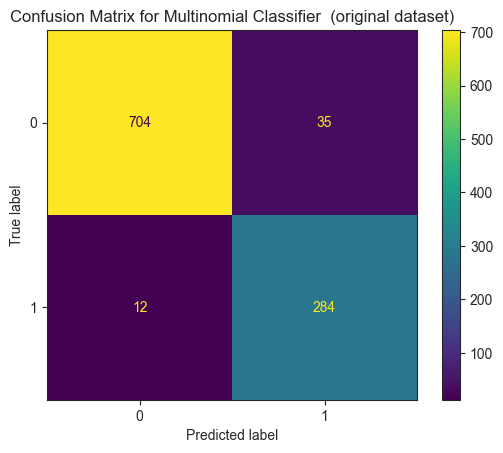

In [52]:
# Display confusioni matrix for MultinomialNB

sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test_1, y_pred_for_mnb_1)).plot()
plt.title("Confusion Matrix for Multinomial Classifier  (original dataset)")

- missing spam (false negatives) - 12
- flagging legitimate emails (false positives) - 35